In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from keras.preprocessing.image import ImageDataGenerator

## Import the Dataset

Check the file path

In [2]:
pwd

'/Users/Ting/Documents/Ting Wang/NU - MSiA/432 Deep Learning/Project/MSiA-432-DeepLearning-Project/notebook'

In [3]:
# Training and Validation datasets
data_dict = '/Users/Ting/Documents/Ting Wang/NU - MSiA/432 Deep Learning/Project/MSiA-432-DeepLearning-Project/data/archive' 
print(os.listdir(data_dict))

['.DS_Store', 'Training', 'Validation']


In [4]:
# Classes within the training dataset
classes = os.listdir(data_dict + "/Training")
print(classes)

['.DS_Store', 'male', 'female']


In [5]:
# Images for male training dataset
male_images = os.listdir(data_dict + "/Training/male")
print('No. of training examples of male:', len(male_images))
print(male_images[:5])

No. of training examples of male: 23766
['194560.jpg.jpg', '186101.jpg.jpg', '098916.jpg.jpg', '179163.jpg.jpg', '169362.jpg.jpg']


In [6]:
# Images for female training dataset
female_images = os.listdir(data_dict + "/Training/female")
print('No. of training examples for female:', len(female_images))
print(female_images[:5])

No. of training examples for female: 23243
['134308.jpg.jpg', '166908.jpg.jpg', '181147.jpg.jpg', '136568.jpg.jpg', '184761.jpg.jpg']


Load the training dataset

In [7]:
transform_face = transforms.Compose([
        #transforms.ToPILImage(),
        transforms.Resize([64,64]),
        transforms.ToTensor(),
])

train_ds = ImageFolder(data_dict+'/Training', transform=transform_face)

In [8]:
img, label = train_ds[0]
print(img.shape, label)
img

torch.Size([3, 64, 64]) 0


tensor([[[0.1451, 0.1490, 0.1490,  ..., 0.2392, 0.2157, 0.2118],
         [0.1216, 0.1255, 0.1373,  ..., 0.2627, 0.2392, 0.2471],
         [0.1137, 0.0980, 0.1176,  ..., 0.2000, 0.2667, 0.2549],
         ...,
         [0.0667, 0.0510, 0.0353,  ..., 0.0784, 0.0353, 0.0431],
         [0.0588, 0.0431, 0.0392,  ..., 0.0392, 0.0549, 0.0784],
         [0.0549, 0.0353, 0.0196,  ..., 0.0667, 0.0706, 0.0588]],

        [[0.1451, 0.1490, 0.1490,  ..., 0.2392, 0.2157, 0.2118],
         [0.1216, 0.1255, 0.1373,  ..., 0.2627, 0.2392, 0.2471],
         [0.1137, 0.0980, 0.1176,  ..., 0.2000, 0.2667, 0.2549],
         ...,
         [0.0902, 0.0706, 0.0510,  ..., 0.0784, 0.0392, 0.0471],
         [0.0980, 0.0706, 0.0510,  ..., 0.0392, 0.0627, 0.0824],
         [0.0863, 0.0588, 0.0353,  ..., 0.0667, 0.0745, 0.0588]],

        [[0.1373, 0.1412, 0.1412,  ..., 0.2471, 0.2235, 0.2196],
         [0.1137, 0.1176, 0.1294,  ..., 0.2706, 0.2471, 0.2549],
         [0.1059, 0.0902, 0.1098,  ..., 0.2000, 0.2706, 0.

In [9]:
print(train_ds.classes)

['female', 'male']


In [10]:
def show_example(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  female (0)


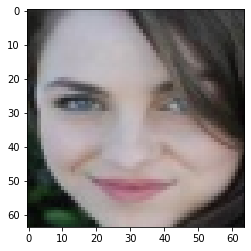

In [11]:
show_example(*train_ds[0])

Load the validation dataset

In [12]:
val_ds = ImageFolder(data_dict+'/Validation', transform=transform_face)

Label:  female (0)


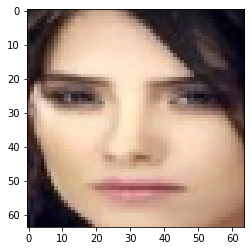

In [13]:
show_example(*val_ds[0])

Create data loaders to load the data in batches

In [14]:
batch_size = 50
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

## Use keras.preprocessing to load the images

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [19]:
train_generator = train_datagen.flow_from_directory(
data_dict, 
target_size=(256,256), 
color_mode='rgb', 
batch_size=64, 
class_mode='categorical', 
subset='training',
shuffle=True,
seed=42
)


Found 46928 images belonging to 2 classes.


In [24]:
train_generator[0]

(array([[[[0.69803923, 0.5803922 , 0.4784314 ],
          [0.69803923, 0.5803922 , 0.4784314 ],
          [0.69803923, 0.5803922 , 0.4784314 ],
          ...,
          [0.7372549 , 0.48627454, 0.24705884],
          [0.7372549 , 0.48627454, 0.24705884],
          [0.7372549 , 0.48627454, 0.24705884]],
 
         [[0.69803923, 0.5803922 , 0.4784314 ],
          [0.69803923, 0.5803922 , 0.4784314 ],
          [0.69803923, 0.5803922 , 0.4784314 ],
          ...,
          [0.7372549 , 0.48627454, 0.24705884],
          [0.7372549 , 0.48627454, 0.24705884],
          [0.7372549 , 0.48627454, 0.24705884]],
 
         [[0.7019608 , 0.58431375, 0.48235297],
          [0.7019608 , 0.58431375, 0.48235297],
          [0.7019608 , 0.58431375, 0.48235297],
          ...,
          [0.7372549 , 0.48627454, 0.24705884],
          [0.7372549 , 0.48627454, 0.24705884],
          [0.7372549 , 0.48627454, 0.24705884]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     